In [15]:
import pandas as pd
from lastfm_api import LastfmApi
import matplotlib.pyplot as plt
import matplotlib
from ggplot import *
import datetime
matplotlib.style.use('ggplot')
%matplotlib inline

In [16]:
data = pd.read_csv('output-lastfm.log', sep= '	', header=None, names=['date', 'trackname', 'artistname', 'albumname', 'trackmbid', 'artistmbid', 'albummbid'])

df = pd.DataFrame(data)
df2 = pd.DataFrame(data)

df2['date'] = pd.to_datetime(df2['date'], unit='s',format='%Y-%m-%d %H:%M:%S.%f')
df2['count'] = 1

df_sample = df2.sample(n=100)
df_sample.head()

,date,trackname,artistname,albumname,trackmbid,artistmbid,albummbid,count
16044,2014-12-17 07:46:43,Tha City Paper - Genius Wrote It ft Starlito &...,Starlito,Theories,NaN,89e1d59f-4e8b-43e6-b1fd-aca7491c5520,NaN,1
78951,2011-10-26 11:58:52,Computer Show (EP Version),Adam Green,Garfield,NaN,150e799b-3244-45d9-a6cb-5a3e8c33d430,b6e8c2ca-c53e-43b5-a304-bd85c58af006,1
35761,2013-07-26 06:28:11,Dico (cdk) chez Oster Lapwass,Dico,Bootleg Videos,NaN,8813646f-9087-4bc5-86dd-c6296962222f,NaN,1
105279,2010-07-05 12:12:32,I'm Fucked,Gus Black,Today Is Not The Day To Fuck With Gus Black,49ca5f95-3a52-4d28-9a2d-515f164a98a0,44bf4af9-0910-4a67-b4b6-55afbeef00d4,2d1c607a-00ff-49fd-85db-5f306e0ec123,1
110850,2010-02-09 12:35:41,Born Slippy (Nuxx),Get Well Soon,"Rest Now, Weary Head",NaN,7bfdd0ec-adc2-455e-bd1f-eba31d64aa3a,NaN,1


In [17]:
df_s = df2.sort_values(by='date')

In [18]:
unique_songs = df_s.drop_duplicates('trackname')
unique_artists = df_s.drop_duplicates('artistname')
unique_albums = df_s.drop_duplicates('albumname')

unique_songs = unique_songs.set_index('date')
unique_artists = unique_artists.set_index('date')
unique_albums = unique_albums.set_index('date')

unique_songs = unique_songs['count']
unique_songs = unique_songs.cumsum()

unique_artists = unique_artists['count']
unique_artists = unique_artists.cumsum()

unique_albums = unique_albums['count']
unique_albums = unique_albums.cumsum()

unique_songs_i = unique_songs.reset_index()
unique_artists_i = unique_artists.reset_index()
unique_albums_i = unique_albums.reset_index()

uniques = pd.merge(unique_songs_i, unique_artists_i, on='date')
uniques = pd.merge(uniques, unique_albums_i, on='date')

uniques.columns = ['date', 'count_songs', 'count_artists', 'count_albums']

# Listens by songs, albums & artists cumsum

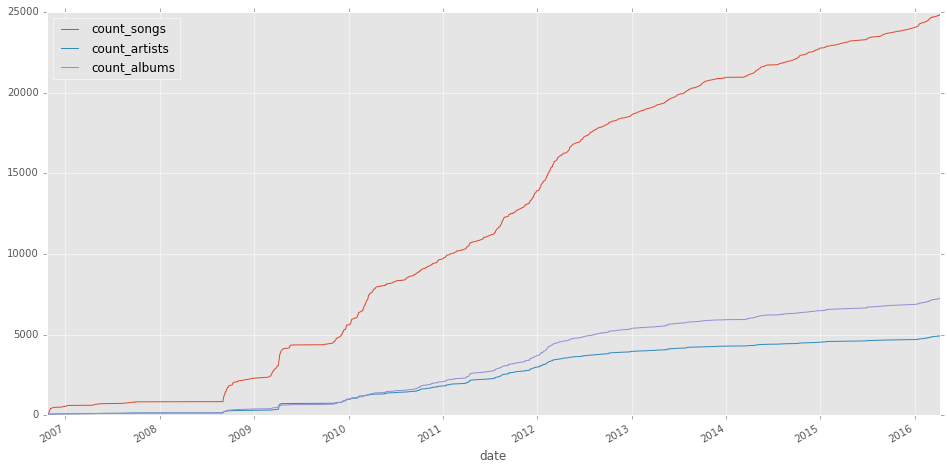

In [19]:
uniques = uniques.set_index('date')
uniques.plot(figsize=(16,8))

# Number of listens by Month

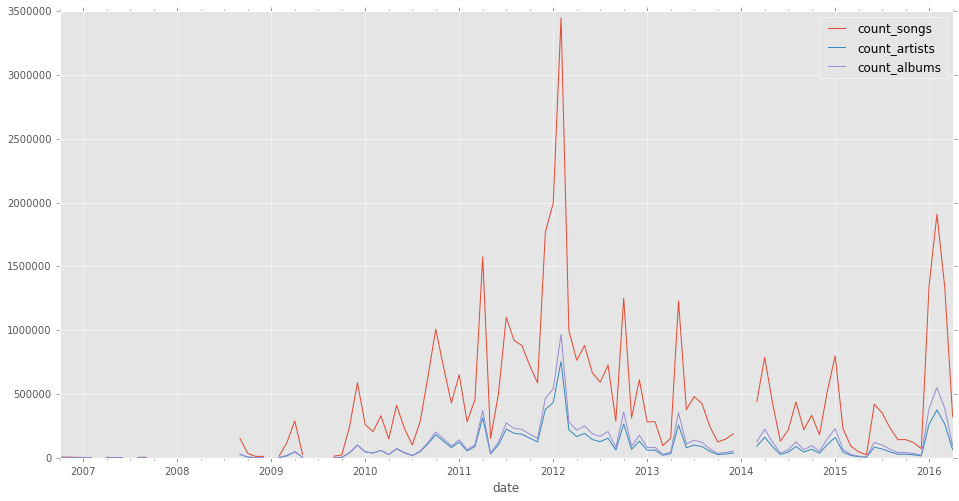

In [20]:
month_listen = uniques.resample('M').sum()
month_listen.plot(figsize=(16,8))

# Number of listens by year

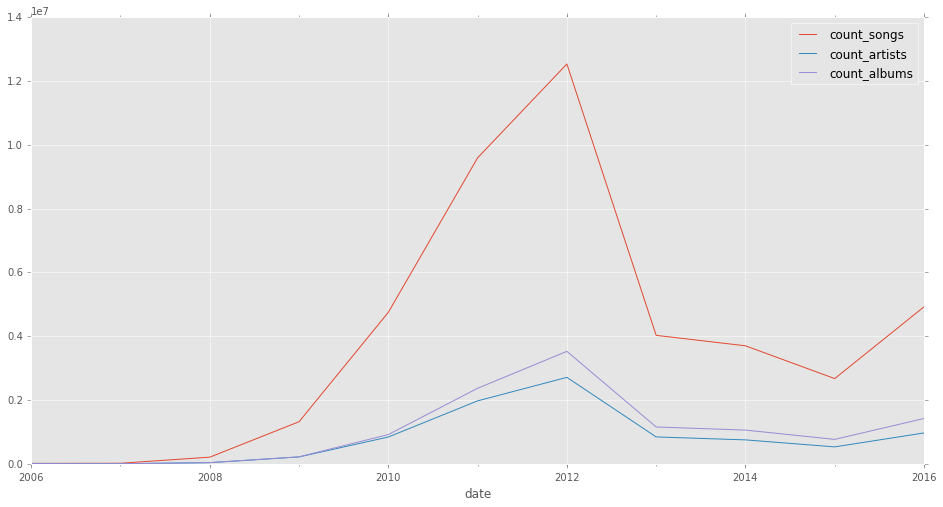

In [21]:
year_listen = uniques.resample('A').sum()
year_listen.plot(figsize=(16,8))

# Number of listens by hour

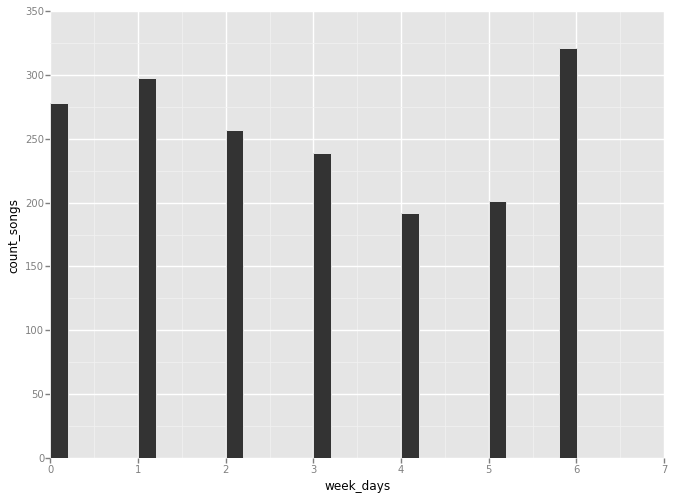

<ggplot: (298327845)>

In [32]:
hour_listen = uniques.resample('H').sum()
#hour_listen.plot(figsize=(16,8))
hour_listen['week_days'] = hour_listen.index.weekday
hour_listen = hour_listen.reset_index()
#hour_listen = hour_listen.set_index('week_days')
#
hour_listen = hour_listen.drop("date", 1)
#hour_listen.head()
#hour_listen.plot(figsize=(16,8))
ggplot(aes(x='week_days', y='count_songs'), data=hour_listen) + geom_bar()